In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Ecommerece=pd.read_csv('Ecommerce Customers')

In [3]:
Ecommerece.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
Ecommerece.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## #Deleting the Feature Which are not related to build the model

In [5]:
Ecom=Ecommerece.drop(columns=['Email','Address','Avatar'],axis=1)

In [6]:
Ecom.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [7]:
Ecom.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


# #pairplot

<Figure size 576x432 with 0 Axes>

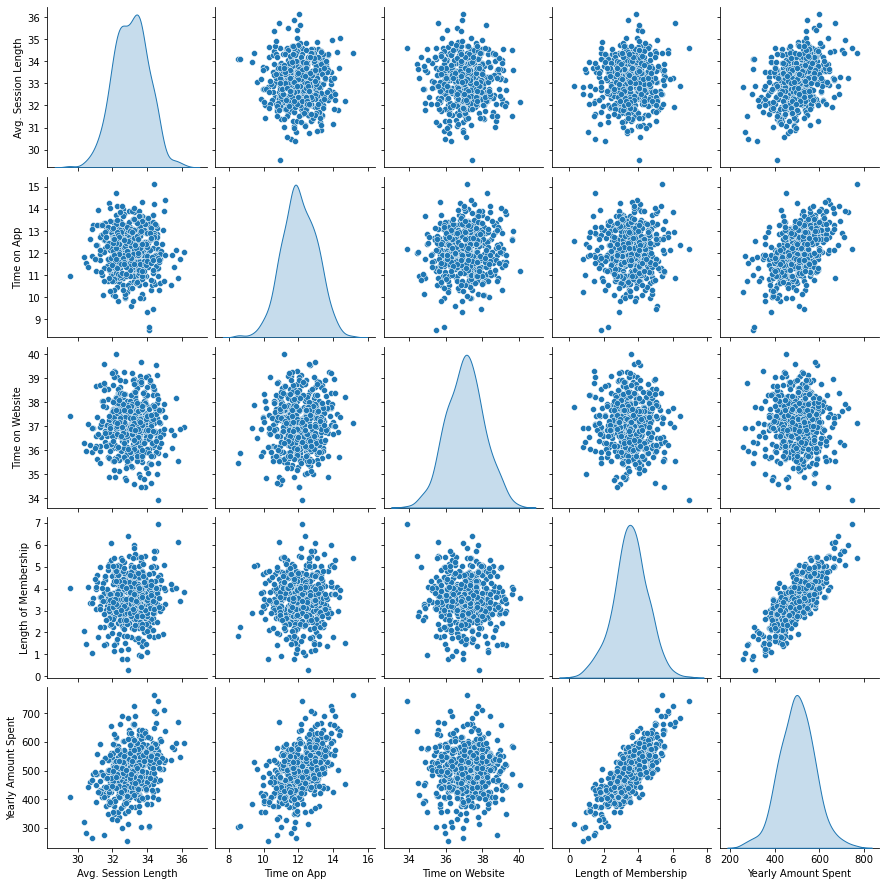

In [55]:
plt.figure(figsize=(8,6))
sns.pairplot(Ecom,diag_kind='kde')
plt.show()

<AxesSubplot:>

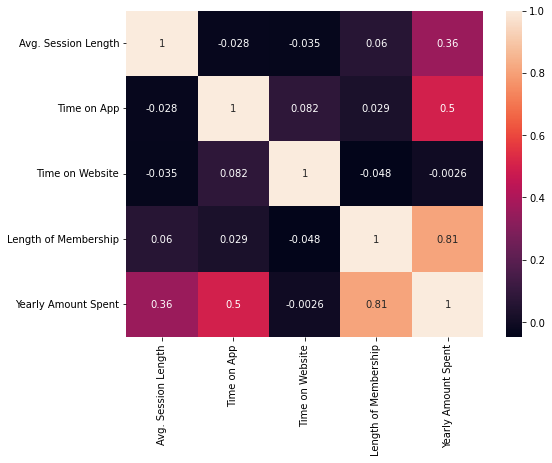

In [8]:
## Check correlation bet the each Feature
plt.figure(figsize=(8,6))
sns.heatmap(Ecom.corr(),annot=True)

In [9]:
Ecom.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

## #Multiple LinearRegression

In [37]:
X=Ecom.drop(columns='Yearly Amount Spent',axis=1)
y=Ecom['Yearly Amount Spent']

## #Multi-collinearity Checks for multiple Regression

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])],index=X.columns)
vif

Avg. Session Length     613.185924
Time on App             144.019714
Time on Website         658.495572
Length of Membership     13.578801
dtype: float64

In [45]:
# import statsmodels.api as sm
# sm.qqplot(residuals)
# plt.show()

In [46]:
X=Ecom.drop(columns='Yearly Amount Spent',axis=1).values
y=Ecom['Yearly Amount Spent'].values

In [42]:
y[:5]

array([587.95105397, 392.20493344, 487.54750487, 581.85234404,
       599.40609205])

In [13]:
#Model training and build
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=101,test_size=0.3)

In [14]:
print('Xtrain:',x_train.shape)
print('Xtest:',x_test.shape)
print('Ytrain:',y_train.shape)
print('Ytest:',y_test.shape)

Xtrain: (350, 4)
Xtest: (150, 4)
Ytrain: (350,)
Ytest: (150,)


In [15]:
#model fitting and prediction
from sklearn.linear_model import LinearRegression
mlin_mdel=LinearRegression().fit(x_train,y_train)
y_pred=mlin_mdel.predict(x_test)


In [16]:
print(y_test.size)

150


In [17]:
print(y_pred.size)

150


In [18]:
df=pd.DataFrame({'Actual':y_test,'predicted':y_pred})
df

,Actual,predicted
0,452.315675,456.441861
1,401.033135,402.720053
2,410.069611,409.253154
3,599.406092,591.431034
4,586.155870,590.014373
...,...,...
145,479.731938,478.300766
146,488.387526,484.410296
147,461.112248,457.590999
148,407.704548,411.526576


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


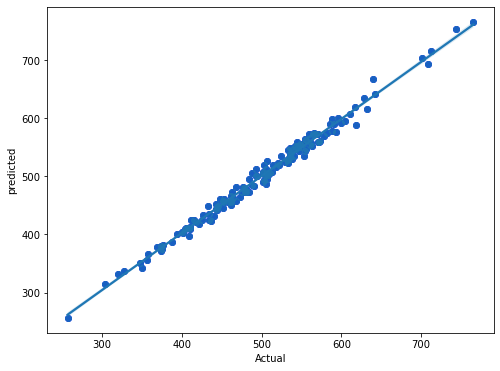

In [19]:
#plot of predicted values and actual values
plt.figure(figsize=(8,6))
plt.scatter(x=df['Actual'],y=df['predicted'],color='blue')
sns.regplot(df['Actual'],df['predicted'])
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.show()

##  #Model Evaluation

In [20]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print('MAE:-',mean_absolute_error(y_test,y_pred))
print('r2Score:-',r2_score(y_test,y_pred))
print('MSE:-',mean_squared_error(y_test,y_pred))

MAE:- 7.228148653430853
r2Score:- 0.9890046246741233
MSE:- 79.81305165097484


## #Performace Evaluation

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


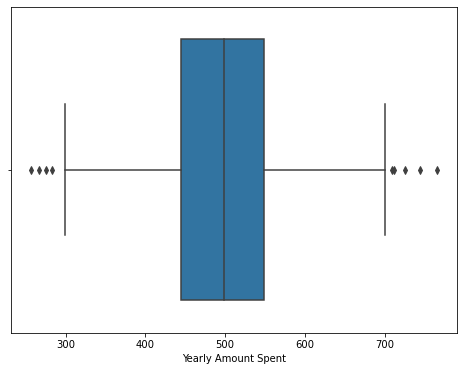

In [21]:
#find the outlier from given datasets
plt.figure(figsize=(8,6))
sns.boxplot(Ecom['Yearly Amount Spent'])
plt.show()

In [22]:
#Remove outlier
#function to find outliers
def find_outliers(can):
    q1=can.quantile(0.25)
    q3=can.quantile(0.75)
    IQR=q3-q1
    outlier=can[((can<(q1-1.5*IQR)) | (can>(q3+ 1.5* IQR)))]
    return outlier.to_list()
outliers=find_outliers(can=Ecom['Yearly Amount Spent'])
ecomDf=Ecom.query(f" `Yearly Amount Spent` not in {outliers}")

In [23]:
ecomDf.shape

(491, 5)

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


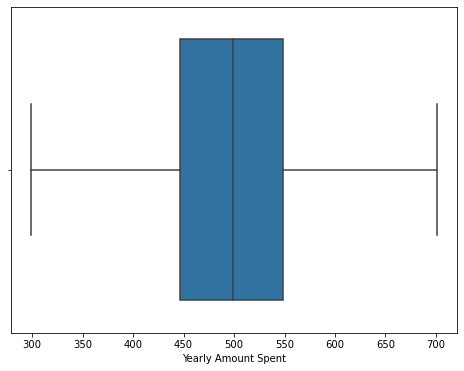

In [24]:
#after removing the outlier from given datasets
plt.figure(figsize=(8,6))
sns.boxplot(ecomDf['Yearly Amount Spent'])
plt.show()

## #Model performace after removing the outlier

In [25]:
X1=ecomDf.drop(columns='Yearly Amount Spent',axis=1).values
y1=ecomDf['Yearly Amount Spent'].values

In [26]:
#Model training and build
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X1,y1,random_state=101,test_size=0.3)

#model fitting and prediction
from sklearn.linear_model import LinearRegression
mlin_mdel=LinearRegression().fit(X_train,Y_train)
y_pred1=mlin_mdel.predict(X_test)



from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print('MAE:-',mean_absolute_error(Y_test,y_pred1))
print('r2Score:-',r2_score(Y_test,y_pred1))
print('MSE:-',mean_squared_error(Y_test,y_pred1))

MAE:- 8.277971402146695
r2Score:- 0.984209281890578
MSE:- 105.11788791622321


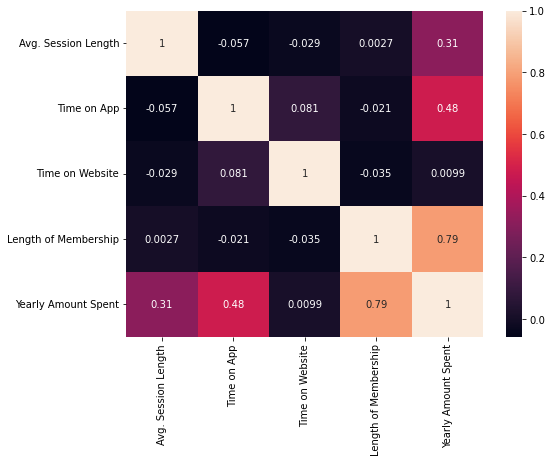

In [27]:
plt.figure(figsize=(8,6))
sns.heatmap(ecomDf.corr(),annot=True)
plt.show()